## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

In [2]:
# 恒等变换，将特征映射到高维空间
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=5):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    #todo '''请实现多项式基函数'''
    #==========
    
    ret = np.concatenate(([x]+[x**i for i in range(2, feature_num+1)]), axis=1)
    return ret

def gaussian_basis(x, feature_num=10):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    centers = np.linspace(np.min(x), np.max(x), feature_num)
    width = 1.0*(centers[1]-centers[0])
    x = np.expand_dims(x, axis=1)
    x = np.concatenate([x]*feature_num, axis=1)
    ret = np.exp(-0.5*((x-centers)/width)**2)
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

### 最小二乘法

In [3]:
def main(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = identity_basis 
    # 恒等映射后的X_train同形状 偏置项 phi0
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1) 
    phi1 = basis_func(x_train) 
    phi = np.concatenate([phi0, phi1], axis=1)
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    # f是x到y的映射

    # 最小二乘法
    xTx = np.dot(phi.T, phi)
    if xTx.ndim == 0:
        xTx = np.array([[xTx]])
    xTx_inv = np.linalg.pinv(xTx)
    xTy = np.dot(phi.T, y_train)
    w = np.dot(xTx_inv, xTy)

    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y 

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)
训练集预测值与真实值的标准差：2.0
预测值与真实值的标准差：2.2


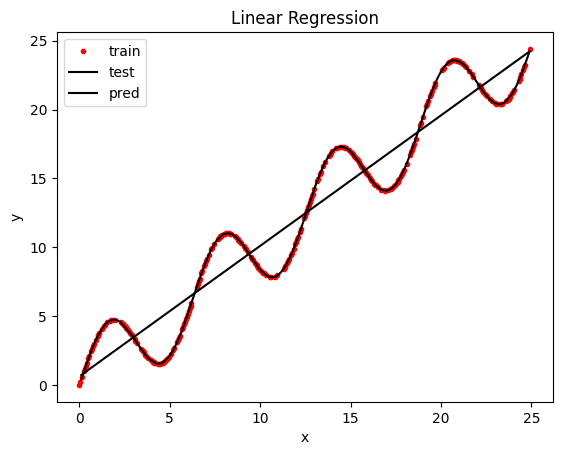

In [4]:
def evaluate(ys, ys_pred): # 均方误差(MSE)
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2)) # 标准差
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main(x_train, y_train) # x到y的映射，f是训练结果（含最优参数w的模型）

    y_train_pred = f(x_train) # 模型进行预测
    std = evaluate(y_train, y_train_pred) # MSE
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_test_pred = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_test_pred)
    print('预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'k')
    plt.plot(x_test, y_test_pred, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'pred'])
    plt.show()

### 使用tensorflow2.0 进行梯度下降

In [5]:
import tensorflow as tf
from tensorflow.keras import optimizers, layers, Model

class linearModel(Model):
    def __init__(self, ndim):
        super(linearModel, self).__init__()
        self.w = tf.Variable(
            shape=[ndim, 1], 
            initial_value=tf.random.uniform(
                [ndim,1], minval=-0.1, maxval=0.1, dtype=tf.float32))
        
    @tf.function
    def call(self, x):
        y = tf.squeeze(tf.matmul(x, self.w), axis=1)
        return y

basis_func = gaussian_basis
xs, ys = load_data('train.txt')
o_x, o_y = xs, ys
phi0 = np.expand_dims(np.ones_like(xs), axis=1)
phi1 = basis_func(xs)
xs = np.concatenate([phi0, phi1], axis=1)
xs= np.float32(xs)
ys = np.float32(ys)       
ndim = xs.shape[1]

model = linearModel(ndim=ndim)


In [6]:
optimizer = optimizers.Adam(0.1)
@tf.function
def train_one_step(model, xs, ys):
    with tf.GradientTape() as tape:
        y_preds = model(xs)
        loss = tf.reduce_mean(tf.sqrt(1e-12+(ys-y_preds)**2))
    grads = tape.gradient(loss, model.w)
    optimizer.apply_gradients([(grads, model.w)])
    return loss

# @tf.function
def predict(model, xs):
    y_preds = model(xs)
    return y_preds

def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

##### 使用train.txt进行训练，test.txt进行评估

loss is 0.3023
loss is 0.3008
loss is 0.2999
loss is 0.2989
loss is 0.2984
loss is 0.2982
loss is 0.2977
loss is 0.2974
loss is 0.2971
loss is 0.2972
训练集预测值与真实值的标准差：0.5
训练集预测值与真实值的标准差：0.6


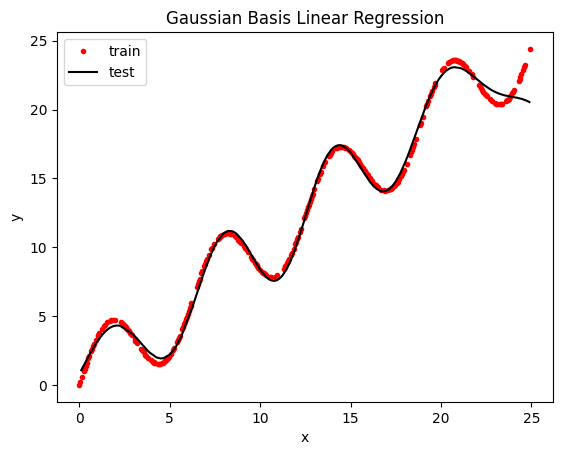

In [9]:
for i in range(1000):
    loss = train_one_step(model, xs, ys)
    if i % 100 == 1:
        print(f'loss is {loss:.4}')
        
        
y_preds = predict(model, xs)
std = evaluate(ys, y_preds)
print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

xs_test, ys_test = load_data('test.txt')
o_x_test, o_y_test = xs_test, ys_test
phi0 = np.expand_dims(np.ones_like(xs_test), axis=1)
phi1 = basis_func(xs_test)
xs_test = np.concatenate([phi0, phi1], axis=1)
xs_test= np.float32(xs_test)
ys_test = np.float32(ys_test)    

y_test_preds = predict(model, xs_test)
std = evaluate(ys_test, y_test_preds)
print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

plt.plot(o_x, o_y, 'ro', markersize=3)
plt.plot(o_x_test, y_test_preds, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gaussian Basis Linear Regression')
plt.legend(['train', 'test', 'pred'])
plt.show()


### 多项式核

In [7]:
basis_func = multinomial_basis
xs, ys = load_data('train.txt')
o_x, o_y = xs, ys
phi0 = np.expand_dims(np.ones_like(xs), axis=1)
phi1 = basis_func(xs)
xs = np.concatenate([phi0, phi1], axis=1)
xs= np.float32(xs)
ys = np.float32(ys)       
ndim = xs.shape[1]

model_mul = linearModel(ndim=ndim)

In [8]:
for i in range(1000):
    loss = train_one_step(model_mul, xs, ys)
    if i % 100 == 1:
        print(f'loss is {loss:.4}')
        
        
y_preds = predict(model_mul, xs)
std = evaluate(ys, y_preds)
print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

loss is 2.388e+04
loss is 2.663e+04
loss is 2.779e+04
loss is 1.117e+04
loss is 1.153e+04
loss is 1.173e+04
loss is 1.185e+04
loss is 1.194e+04
loss is 1.201e+04
loss is 1.207e+04
训练集预测值与真实值的标准差：8204.0


训练集预测值与真实值的标准差：9323.6


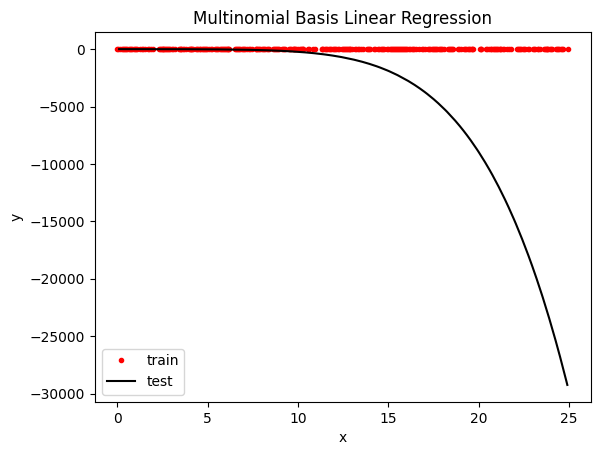

In [9]:
xs_test, ys_test = load_data('test.txt')
o_x_test, o_y_test = xs_test, ys_test
phi0 = np.expand_dims(np.ones_like(xs_test), axis=1)
phi1 = basis_func(xs_test)
xs_test = np.concatenate([phi0, phi1], axis=1)
xs_test= np.float32(xs_test)
ys_test = np.float32(ys_test)    

y_test_preds = predict(model_mul, xs_test)
std = evaluate(ys_test, y_test_preds)
print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

plt.plot(o_x, o_y, 'ro', markersize=3)
plt.plot(o_x_test, y_test_preds, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multinomial Basis Linear Regression')
plt.legend(['train', 'test', 'pred'])
plt.show()


### numpy完成梯度下降

In [17]:
def main2(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = identity_basis 
    # 恒等映射后的X_train同形状 偏置项 phi0
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1) 
    phi1 = basis_func(x_train) 
    phi = np.concatenate([phi0, phi1], axis=1)
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    # f是x到y的映射

    # 梯度下降法
    w = np.random.randn(phi.shape[1])
    N = phi.shape[0]
    epoches = 30
    lr = 0.01
    for epoch in range(epoches):
        y_pred = np.dot(phi, w)
        gradient = -(1 / N)*np.dot(phi.T, y_train - y_pred)
        w -= lr* gradient

    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y 

    return f

训练集预测值与真实值的标准差：2.2
预测值与真实值的标准差：2.3


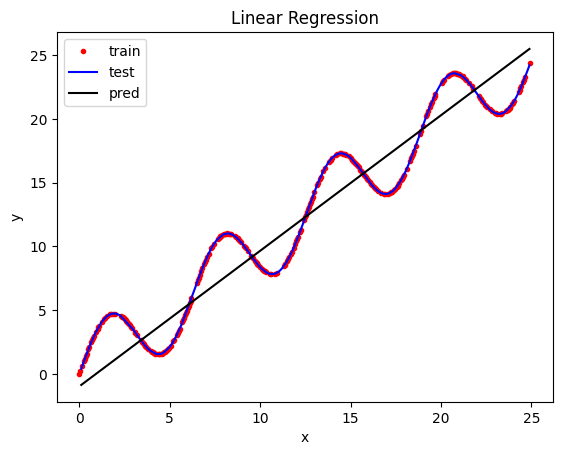

In [22]:

# 使用线性回归训练模型，返回一个函数f()使得y = f(x)
f = main2(x_train, y_train) # x到y的映射，f是训练结果（含最优参数w的模型）

y_train_pred = f(x_train) # 模型进行预测
std = evaluate(y_train, y_train_pred) # MSE
print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

# 计算预测的输出值
y_test_pred = f(x_test)
# 使用测试集评估模型
std = evaluate(y_test, y_test_pred)
print('预测值与真实值的标准差：{:.1f}'.format(std))

#显示结果
plt.plot(x_train, y_train, 'ro', markersize=3)
plt.plot(x_test, y_test, 'b')
plt.plot(x_test, y_test_pred, 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend(['train', 'test', 'pred'])
plt.show()